In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [2]:
data = np.load("adbench/Classical/13_fraud.npz")

In [3]:
print("Arrays in the NPZ file:", data.files)

Arrays in the NPZ file: ['X', 'y']


In [4]:
X = data['X']
y = data['y']

print("Feature array shape:", X.shape)
print("Label array shape:", y.shape)

Feature array shape: (284807, 29)
Label array shape: (284807,)


In [5]:
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['label'] = y

In [6]:
print("DataFrame summary:")
print("\nMissing values per column:")
print(df.isnull().sum())

# Check label distribution (typically 0: normal, 1: anomaly/fraud)
print("\nLabel distribution:")
print(df['label'].value_counts())

DataFrame summary:

Missing values per column:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
label         0
dtype: int64

Label distribution:
0    284315
1       492
Name: label, dtype: int64


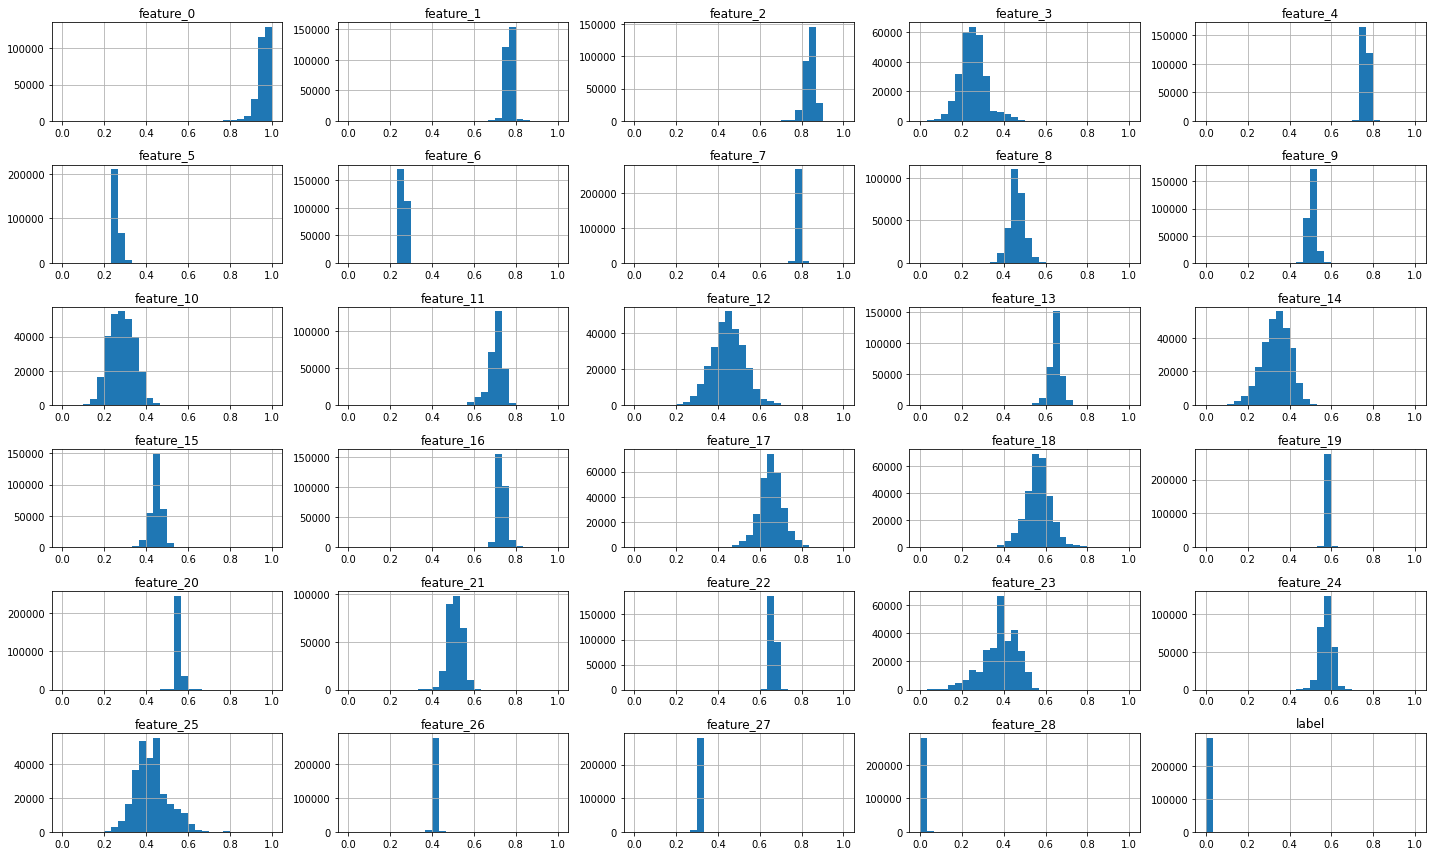

In [7]:
df.iloc[:, :].hist(bins=30, figsize=(20, 12))
plt.tight_layout()
plt.show()


In [8]:
print(f"Dataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum().sum()}")

Dataset shape: (284807, 30)

Data types:
feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
feature_26    float64
feature_27    float64
feature_28    float64
label           int64
dtype: object

Missing values:
0


In [9]:
normal_indices = np.where(y == 0)[0]
anomaly_indices = np.where(y == 1)[0]

selected_normal_indices = np.random.choice(normal_indices, 5000, replace=False)
selected_indices = np.concatenate([selected_normal_indices, anomaly_indices])

X_selected = X[selected_indices]
y_selected = y[selected_indices]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(X_scaled)

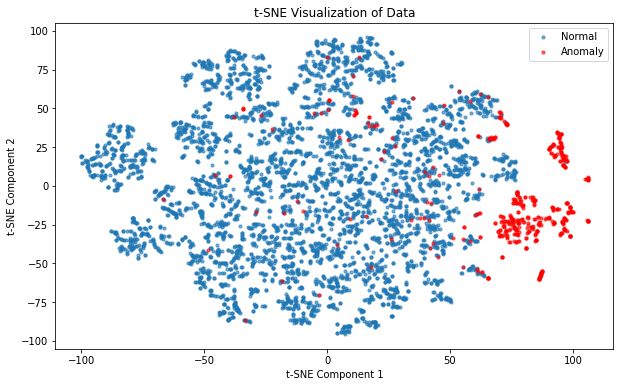

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_selected == 0, 0], X_tsne[y_selected == 0, 1], label="Normal", alpha=0.6, s=10)
plt.scatter(X_tsne[y_selected == 1, 0], X_tsne[y_selected == 1, 1], label="Anomaly", alpha=0.6, s=10, color='red')

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Data")
plt.legend()
plt.show()